In [73]:
# imports
import pandas as pd
import geopandas as gpd
import geojson
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry
import geopy
from geopy.geocoders import Nominatim
import plotly
import plotly.express as px
import json
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [74]:
# for matplotlib figures have a better pixels to save image
plt.rcParams['figure.dpi'] = 100

In [75]:
# upload geodata
states_amazon = gpd.read_file('PRODES_Deforestation_in_Amazonia.shp')

In [76]:
states_amazon.head()

,FID,ID,ORIGIN_ID,STATE,PATH_ROW,MAIN_CLASS,CLASS_NAME,DEF_CLOUD,JULIAN_DAY,IMAGE_DATE,YEAR,AREA_KM,SCENE_ID,PUBLISH_YE,SOURCE,SATELLITE,SENSOR,Shape__Are,Shape__Len,geometry
0,1,823204,32218,PA,22764,DESMATAMENTO,d2018,0,202,2018-07-21 12:00:00,2018,7.055576e-05,101048,2018-01-01,None,None,None,71.886230,66.316744,"POLYGON ((-55.42015 -6.30352, -55.42008 -6.303..."
1,2,823686,32704,PA,22464,DESMATAMENTO,d2018,0,197,2018-07-16 12:00:00,2018,1.499971e-05,101026,2018-01-01,None,None,None,15.270508,547.304654,"POLYGON ((-50.17676 -6.09071, -50.17849 -6.088..."
2,3,823766,32785,AM,23266,DESMATAMENTO,d2018,0,205,2018-07-24 12:00:00,2018,3.202793e-06,101062,2018-01-01,None,None,None,3.289551,424.886018,"POLYGON ((-63.89284 -8.14983, -63.89097 -8.149..."
3,4,823844,32862,AM,23266,DESMATAMENTO,d2018,0,205,2018-07-24 12:00:00,2018,1.328430e-07,101062,2018-01-01,None,None,None,0.136719,5.649947,"POLYGON ((-64.00611 -8.57198, -64.00609 -8.571..."
4,5,120162,370649,RR,23258,DESMATAMENTO,d2013,0,239,2013-08-27 12:00:00,2013,5.142463e-04,2099,2013-01-01,None,None,None,518.906006,156.203923,"POLYGON ((-61.69033 2.76777, -61.69020 2.76840..."


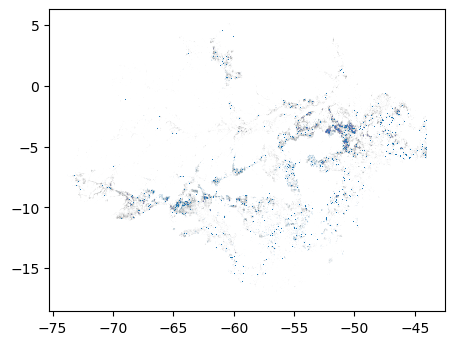

In [77]:
states_amazon.plot()
plt.show()

In [78]:
   # lowercase column names
states_amazon.columns = map(str.lower,states_amazon.columns)

In [79]:
states_amazon.isnull().sum()

fid                0
id                 0
origin_id          0
state              0
path_row           0
main_class         0
class_name         0
def_cloud          0
julian_day         0
image_date         1
year               0
area_km            0
scene_id           0
publish_ye         0
source        518334
satellite     518334
sensor        518334
shape__are       115
shape__len       115
geometry        1724
dtype: int64

In [80]:
    # get the month, year, and day
states_amazon['image_date'] = pd.to_datetime(states_amazon['image_date'])
states_amazon['day'] = pd.to_datetime(states_amazon['image_date']).dt.day
states_amazon['month'] = pd.to_datetime(states_amazon['image_date']).dt.month
states_amazon['year'] = pd.to_datetime(states_amazon['image_date']).dt.year

In [82]:
# retrieve latitude and longitude
states_amazon = states_amazon.to_crs("EPSG:4326")
states_amazon['lon'] = states_amazon.centroid.x
states_amazon['lat'] = states_amazon.centroid.y

<ipython-input-82-bb581195290c>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states_amazon['lon'] = states_amazon.centroid.x
<ipython-input-82-bb581195290c>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states_amazon['lat'] = states_amazon.centroid.y


In [83]:
    # add states names # ['Para', 'Mato Grosso', 'Rondonia', 'Amazonias', 'Acre', 'Roraima', 'Amapa', 'Tocantins']
states_amazon['states'] = states_amazon['state'].replace({'PA': 'Para', 'MT': 'Mato Grosso', 'RO': 'Rondonia', 'AM': 'Amazonas',
                                   'MA': 'Maranhao', 'AC': 'Acre', 'RR': 'Roraima',
                                  'AP': 'Amapa', 'TO': 'Tocantins'})

In [84]:
states_amazon.head()

,fid,id,origin_id,state,path_row,main_class,class_name,def_cloud,julian_day,image_date,...,satellite,sensor,shape__are,shape__len,geometry,day,month,lon,lat,states
0,1,823204,32218,PA,22764,DESMATAMENTO,d2018,0,202,2018-07-21 12:00:00,...,None,None,71.886230,66.316744,"POLYGON ((-55.42015 -6.30352, -55.42008 -6.303...",21.0,7.0,-55.420054,-6.303501,Para
1,2,823686,32704,PA,22464,DESMATAMENTO,d2018,0,197,2018-07-16 12:00:00,...,None,None,15.270508,547.304654,"POLYGON ((-50.17676 -6.09071, -50.17849 -6.088...",16.0,7.0,-50.177911,-6.089558,Para
2,3,823766,32785,AM,23266,DESMATAMENTO,d2018,0,205,2018-07-24 12:00:00,...,None,None,3.289551,424.886018,"POLYGON ((-63.89284 -8.14983, -63.89097 -8.149...",24.0,7.0,-63.891592,-8.149580,Amazonas
3,4,823844,32862,AM,23266,DESMATAMENTO,d2018,0,205,2018-07-24 12:00:00,...,None,None,0.136719,5.649947,"POLYGON ((-64.00611 -8.57198, -64.00609 -8.571...",24.0,7.0,-64.006096,-8.571971,Amazonas
4,5,120162,370649,RR,23258,DESMATAMENTO,d2013,0,239,2013-08-27 12:00:00,...,None,None,518.906006,156.203923,"POLYGON ((-61.69033 2.76777, -61.69020 2.76840...",27.0,8.0,-61.690243,2.767979,Roraima


In [85]:
    # remove some columns
states_amazon = states_amazon.drop(columns=['image_date', 'source', 'satellite', 'sensor'])

In [86]:
states_amazon.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 518334 entries, 0 to 518333
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   fid         518334 non-null  int64   
 1   id          518334 non-null  int64   
 2   origin_id   518334 non-null  int64   
 3   state       518334 non-null  object  
 4   path_row    518334 non-null  object  
 5   main_class  518334 non-null  object  
 6   class_name  518334 non-null  object  
 7   def_cloud   518334 non-null  int64   
 8   julian_day  518334 non-null  int64   
 9   year        518333 non-null  float64 
 10  area_km     518334 non-null  float64 
 11  scene_id    518334 non-null  int64   
 12  publish_ye  518334 non-null  object  
 13  shape__are  518219 non-null  float64 
 14  shape__len  518219 non-null  float64 
 15  geometry    516610 non-null  geometry
 16  day         518333 non-null  float64 
 17  month       518333 non-null  float64 
 18  lon         5166

In [87]:
    # get rid of zeros
states_amazon_a = states_amazon.dropna()

In [88]:
states_amazon_a.isnull().sum()

fid           0
id            0
origin_id     0
state         0
path_row      0
main_class    0
class_name    0
def_cloud     0
julian_day    0
year          0
area_km       0
scene_id      0
publish_ye    0
shape__are    0
shape__len    0
geometry      0
day           0
month         0
lon           0
lat           0
states        0
dtype: int64

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shape__are'>

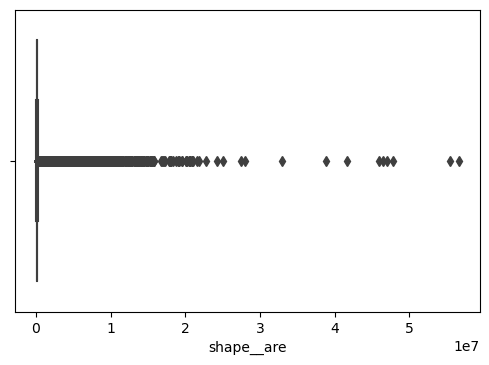

In [89]:
sns.boxplot(states_amazon_a.shape__are)

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shape__len'>

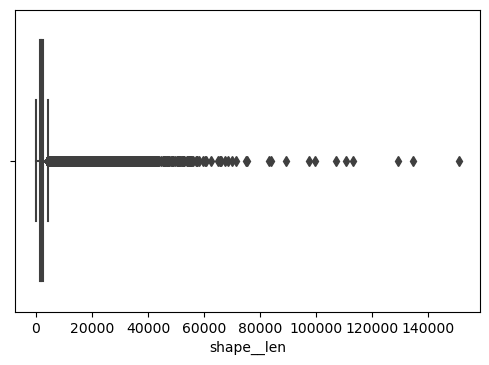

In [90]:
sns.boxplot(states_amazon_a.shape__len)

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_km'>

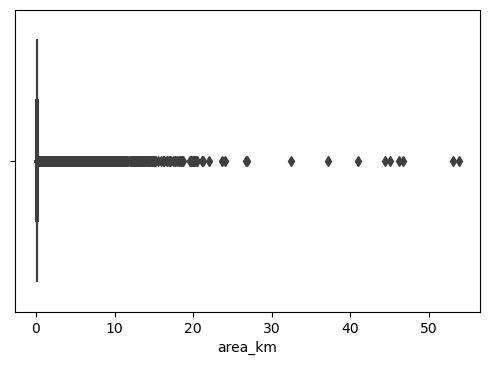

In [91]:
sns.boxplot(states_amazon_a.area_km)

In [92]:
   # remove outliers (values that are more than 3 standard deviations from the mean)
z_scores = zscore(states_amazon_a['area_km'])
z_scores_abs = np.abs(z_scores)
z_scores_abs
z_scores_filtered = z_scores < 3
states_amazon_a = states_amazon_a[z_scores_filtered]

In [93]:
states_amazon_a.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 512257 entries, 0 to 518333
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   fid         512257 non-null  int64   
 1   id          512257 non-null  int64   
 2   origin_id   512257 non-null  int64   
 3   state       512257 non-null  object  
 4   path_row    512257 non-null  object  
 5   main_class  512257 non-null  object  
 6   class_name  512257 non-null  object  
 7   def_cloud   512257 non-null  int64   
 8   julian_day  512257 non-null  int64   
 9   year        512257 non-null  float64 
 10  area_km     512257 non-null  float64 
 11  scene_id    512257 non-null  int64   
 12  publish_ye  512257 non-null  object  
 13  shape__are  512257 non-null  float64 
 14  shape__len  512257 non-null  float64 
 15  geometry    512257 non-null  geometry
 16  day         512257 non-null  float64 
 17  month       512257 non-null  float64 
 18  lon         5122

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_km'>

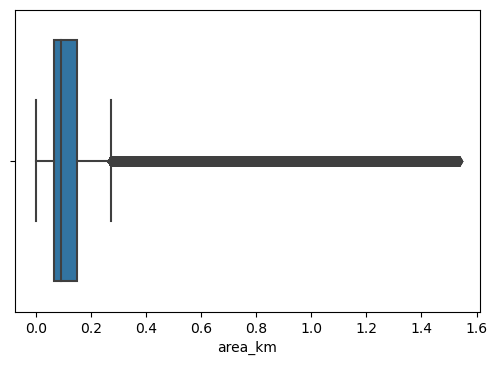

In [94]:
sns.boxplot(states_amazon_a.area_km)

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shape__len'>

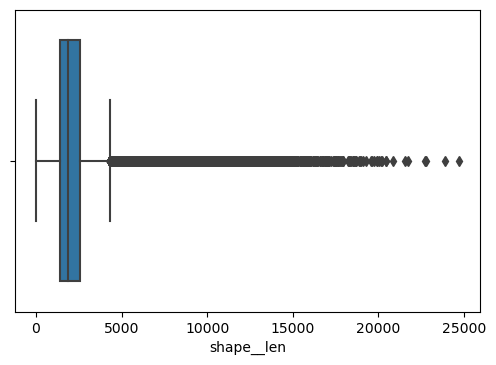

In [95]:
sns.boxplot(states_amazon_a.shape__len)

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shape__are'>

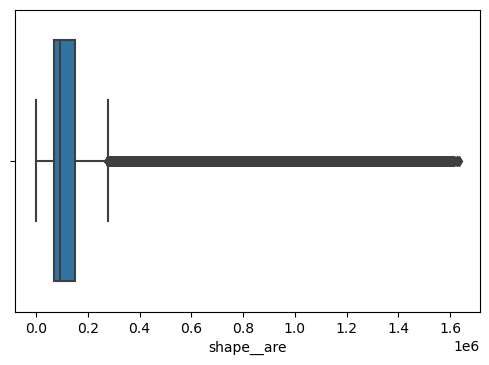

In [96]:
sns.boxplot(states_amazon_a.shape__are)

In [104]:
# Modelling

In [105]:
# Import everything for models
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

# choose metrics MAE (because leaving some outliers)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
# base
mean_area_km = np.mean(states_amazon_a['area_km'])
print(f'Area_km: {mean_area_km}')

mean_lon = np.mean(states_amazon_a['lon'])
print(f'Longitude: {mean_lon}')

mean_lat = np.mean(states_amazon_a['lat'])
print(f'Latitude: {mean_lat}')

Area_km: 0.13631562469344655
Longitude: -55.75286673635948
Latitude: -5.991104393722948


In [107]:
# train/val/test split timebased 
train = states_amazon_a[states_amazon_a['year'] <= 2016]
val = states_amazon_a[states_amazon_a['year'] == 2017]
test = states_amazon_a[states_amazon_a['year'] >= 2018]

train.shape, val.shape, test.shape

((389504, 21), (40826, 21), (81927, 21))

In [108]:
# leave 4 decimal places for Areakm_squared, lat and lon
train = train.round({"areakm_squared":3, "lat":3, "lon":3})
val = val.round({"areakm_squared":3, 'lat':3, 'lon':3})
test = test.round({"areakm_squared":3, 'lat':3, 'lon':3})

In [109]:
# define target
target1 = 'area_km'
target2 = 'lon'
target3 = 'lat'

not_useful = ['fid', 'id', 'state', 'origin_id', 'main_class', 'path_row', 
           'scene_id', 'geometry', 'def_cloud', 'julian_day', 'class_name', 'publish_ye']

# define features
features = train.drop(columns=[target1] + [target2] + [target3] + not_useful).columns.tolist()

In [110]:
features

['year', 'shape__are', 'shape__len', 'day', 'month', 'states']

In [111]:
target1, target2, target3

('area_km', 'lon', 'lat')

In [112]:
# Define X and y 
X_train = train[features]
y_train_1 = train[target1]
y_train_2 = train[target2]
y_train_3 = train[target3]
X_val = val[features]
y_val_1 = val[target1]
y_val_2 = val[target2]
y_val_3 = val[target3]
X_test = test[features]
y_test_1 = test[target1]
y_test_2 = test[target2]
y_test_3 = test[target3]

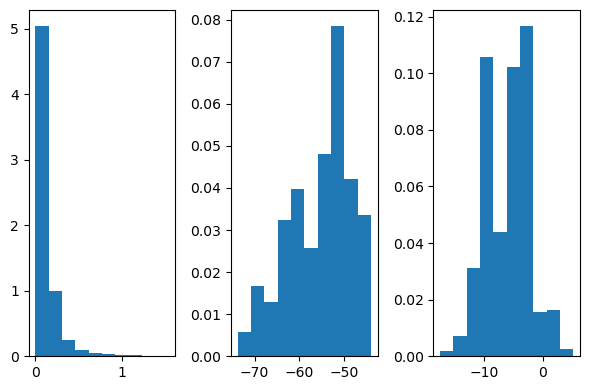

In [113]:
# distribution population data
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].hist(y_train_1, bins=10, density=True)
axs[1].hist(y_train_2, bins=10, density=True)
axs[2].hist(y_train_3, bins=10, density=True);

In [114]:
# 1st_model--- Ridge Regression 
ridge_model = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k='all'), 
    Ridge(alpha=1)
)

ridge_model.fit(X_train, y_train_1)
y_val_pred_1 = ridge_model.predict(X_val)
ridge_model.fit(X_train, y_train_2)
y_val_pred_2 = ridge_model.predict(X_val)
ridge_model.fit(X_train, y_train_3)
y_val_pred_3 = ridge_model.predict(X_val)

print(f'Ridge model validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.6f} area_km')
print(f'Ridge model validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.6f} lon')
print(f'Ridge model validation MAE: {mean_absolute_error(y_val_3, y_val_pred_3):.6f} lat')
print(f'Ridge model Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.6f} area_km')
print(f'Ridge model Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.6f} lon')
print(f'Ridge model Validation RMSE loss: {mean_squared_error(y_val_3, y_val_pred_3):.6f} lat')
print(f'Ridge model Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.6f} area_km')
print(f'Ridge model Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.6f} lon')
print(f'Ridge model Validation R^2 coefficient: {r2_score(y_val_3, y_val_pred_3):.6f} lat')

C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Ridge model validation MAE: 0.001476 area_km
Ridge model validation MAE: 1.929146 lon
Ridge model validation MAE: 1.343786 lat
Ridge model Validation RMSE loss: 0.000009 area_km
Ridge model Validation RMSE loss: 6.072084 lon
Ridge model Validation RMSE loss: 2.844015 lat
Ridge model Validation R^2 coefficient: 0.999693 area_km
Ridge model Validation R^2 coefficient: 0.861619 lon
Ridge model Validation R^2 coefficient: 0.784844 lat


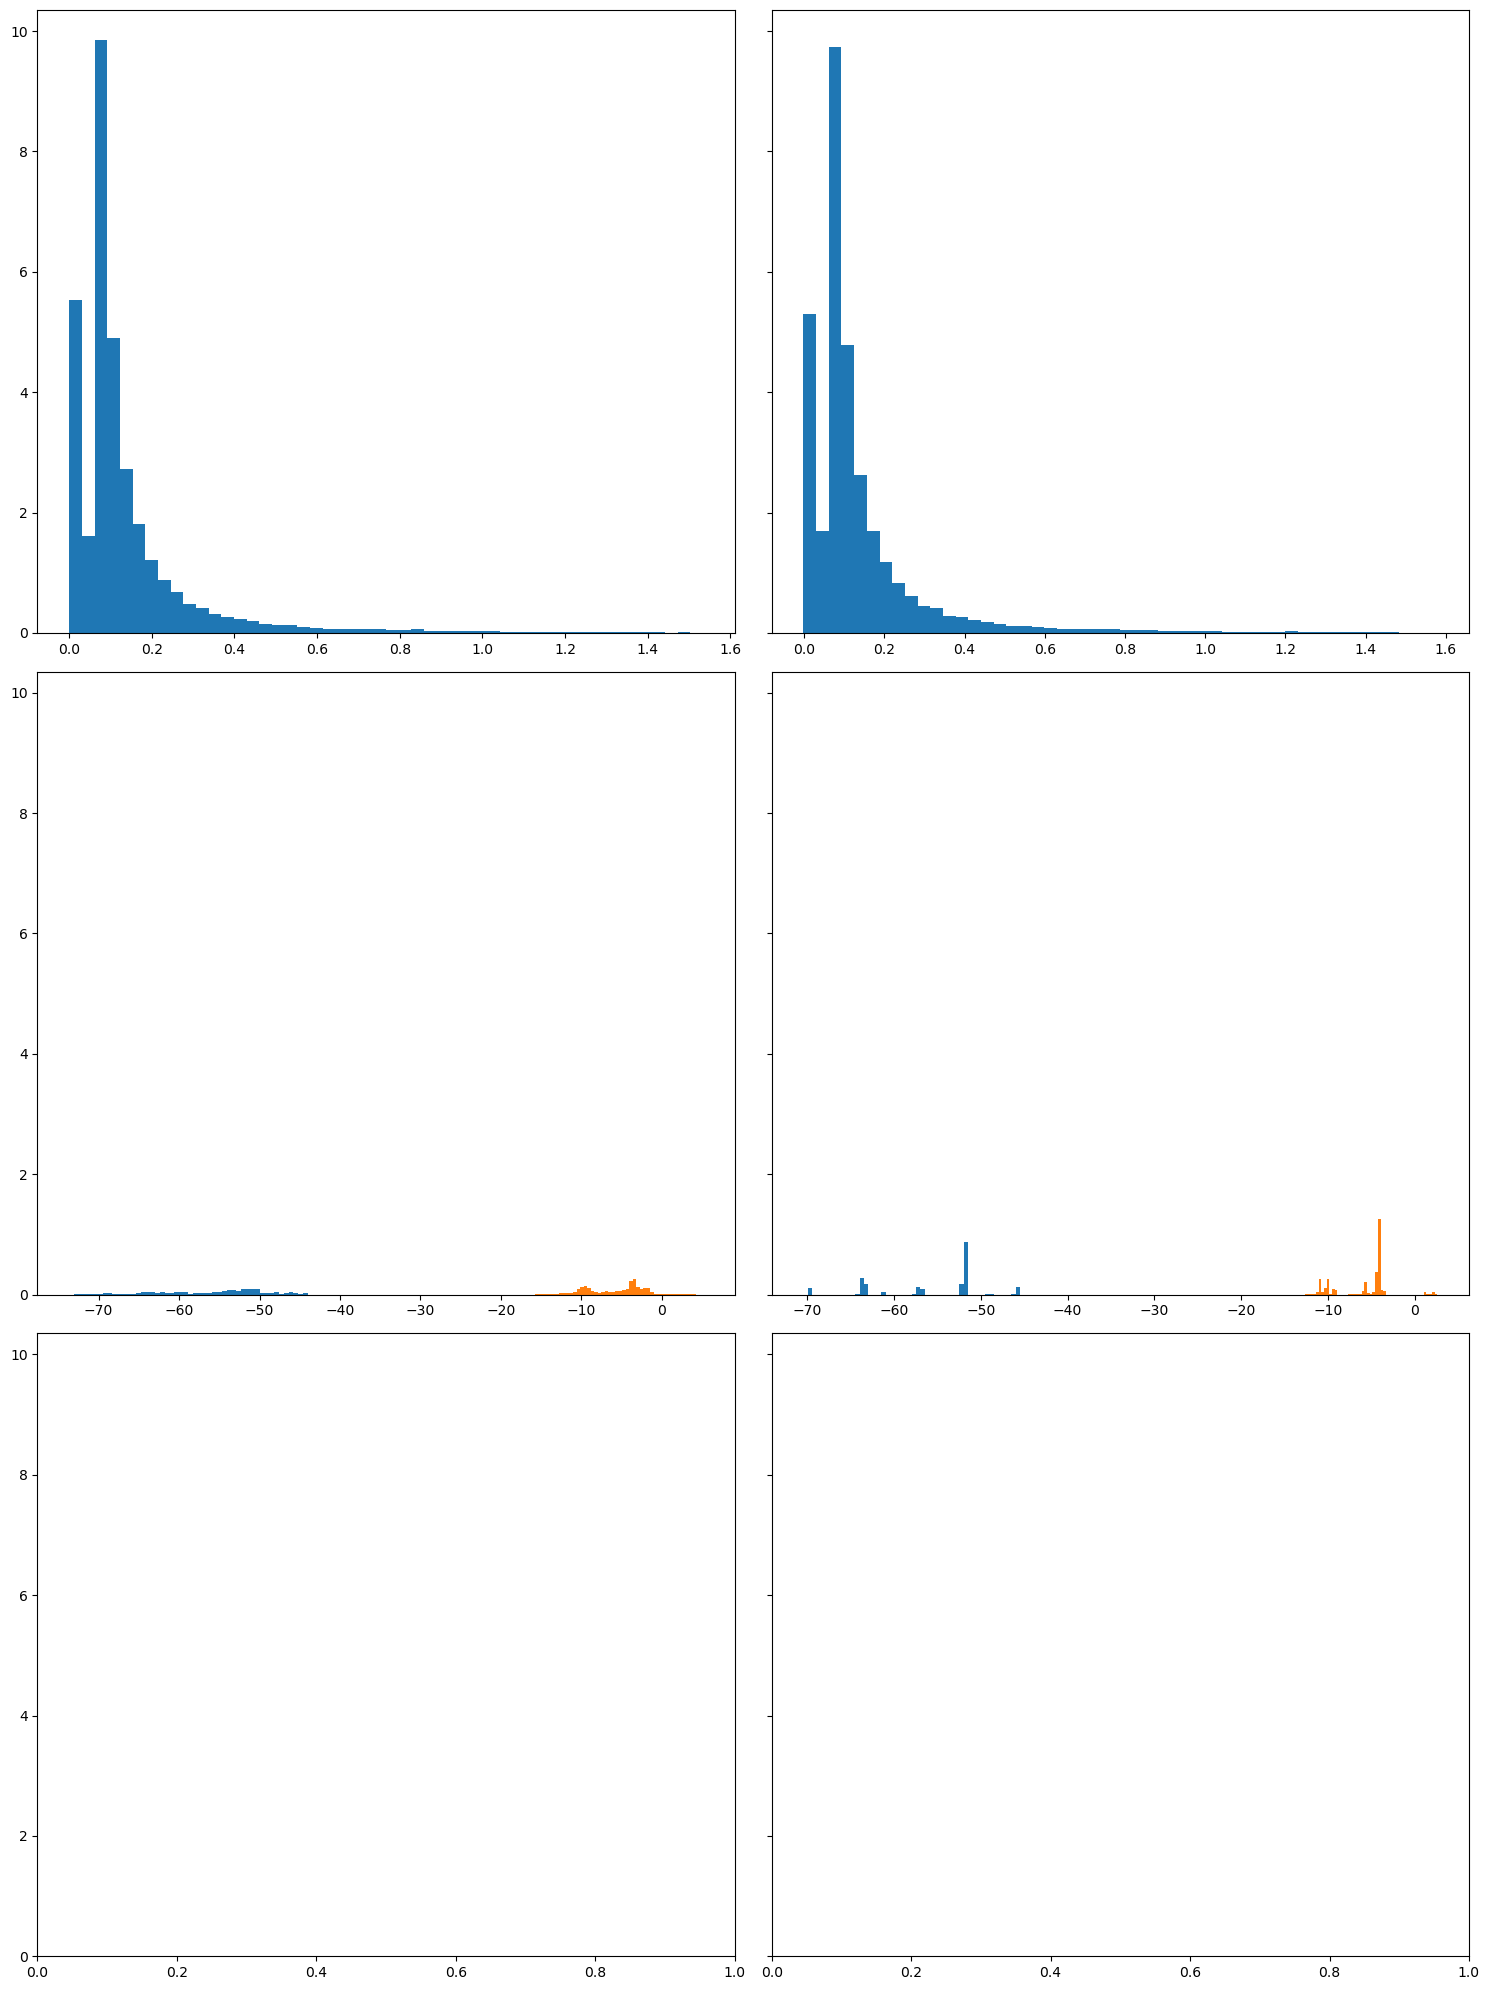

In [115]:
# true distribution vs predicted for Ridge Regression
fig, axs = plt.subplots(3, 2, sharey=True, tight_layout=True, figsize=(15,20))

axs[0, 0].hist(y_val_1, bins=50, density=True)
axs[0, 1].hist(y_val_pred_1, bins=50, density=True);
axs[1, 0].hist(y_val_2, bins=50, density=True)
axs[1, 1].hist(y_val_pred_2, bins=50, density=True);
axs[1, 0].hist(y_val_3, bins=50, density=True)
axs[1, 1].hist(y_val_pred_3, bins=50, density=True);

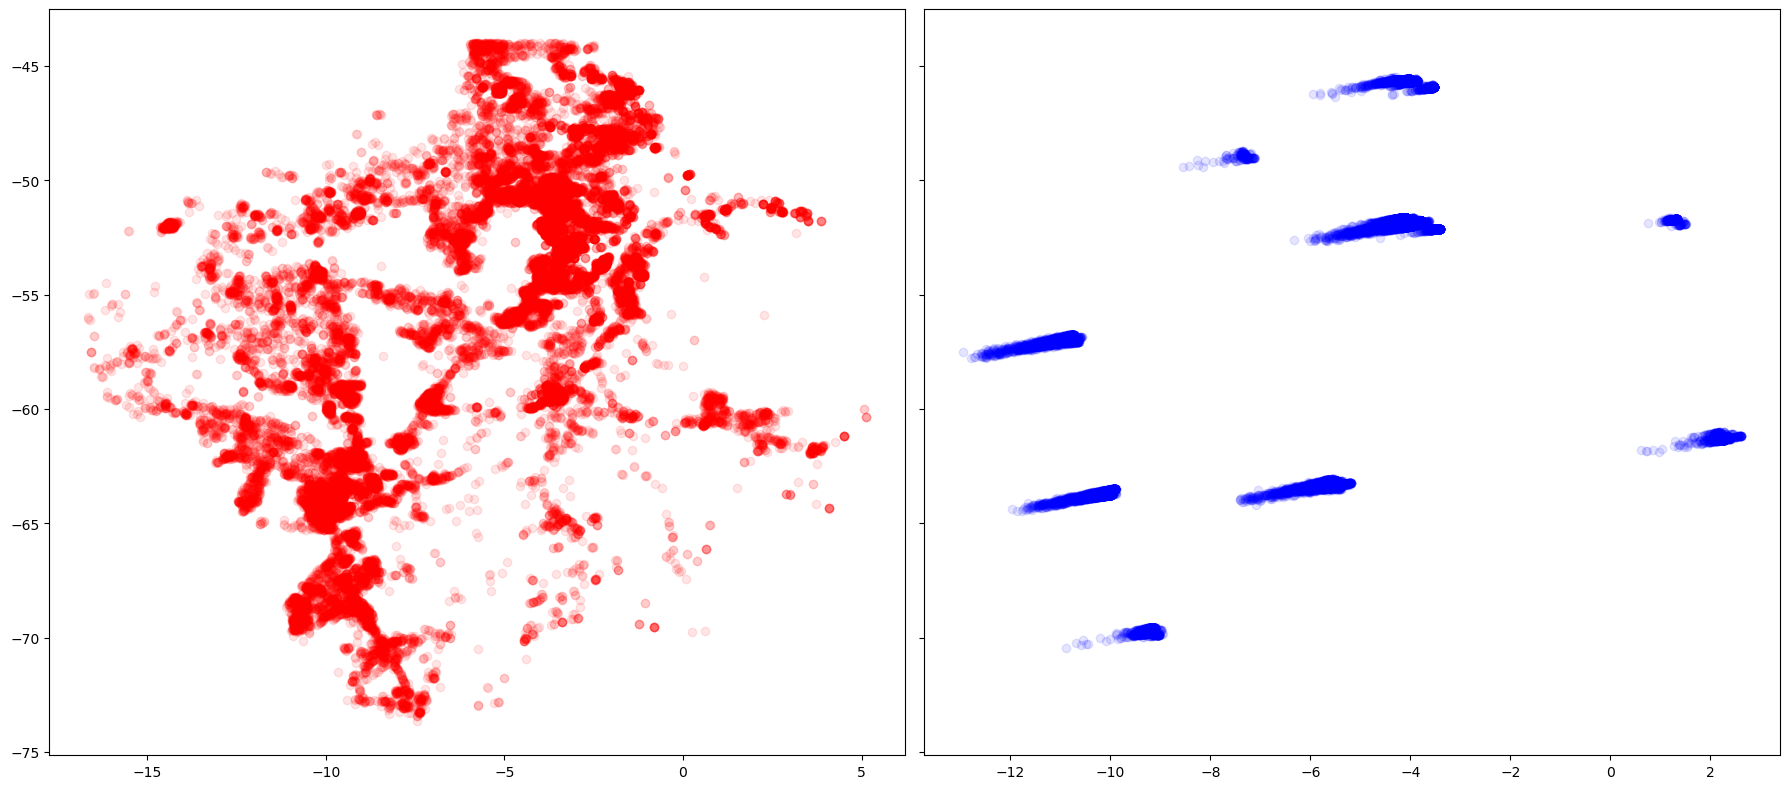

In [116]:
# How Ridge model looks on graph
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_3, y=y_val_2, c='red', alpha=0.1)
axs[1].scatter(x=y_val_pred_3, y=y_val_pred_2, c='blue', alpha=0.1);

In [117]:
# 2nd_model--- Desicion Tree 
dt1 = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeRegressor(random_state=42)
)
dt2 = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeRegressor(random_state=42)
)
dt3 = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeRegressor(random_state=42)
)

dt1.fit(X_train, y_train_1)
y_val_pred_1 = dt1.predict(X_val)
dt2.fit(X_train, y_train_2)
y_val_pred_2 = dt2.predict(X_val)
dt3.fit(X_train, y_train_3)
y_val_pred_3 = dt3.predict(X_val)

print(f'Desicion Tree validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.6f} area_km')
print(f'Desicion Tree validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.6f} lon')
print(f'Desicion Tree validation MAE: {mean_absolute_error(y_val_3, y_val_pred_3):.6f} lat')
print(f'Desicion Tree Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.6f} area_km')
print(f'Desicion Tree Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.6f} lon')
print(f'Desicion Tree Validation RMSE loss: {mean_squared_error(y_val_3, y_val_pred_3):.6f} lat')
print(f'Desicion Tree Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.6f} area_km')
print(f'Desicion Tree Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.6f} lon')
print(f'Desicion Tree Validation R^2 coefficient: {r2_score(y_val_3, y_val_pred_3):.6f} lat')

C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Desicion Tree validation MAE: 0.001145 area_km
Desicion Tree validation MAE: 4.845692 lon
Desicion Tree validation MAE: 1.848714 lat
Desicion Tree Validation RMSE loss: 0.000008 area_km
Desicion Tree Validation RMSE loss: 28.972621 lon
Desicion Tree Validation RMSE loss: 5.483680 lat
Desicion Tree Validation R^2 coefficient: 0.999742 area_km
Desicion Tree Validation R^2 coefficient: 0.339721 lon
Desicion Tree Validation R^2 coefficient: 0.585147 lat


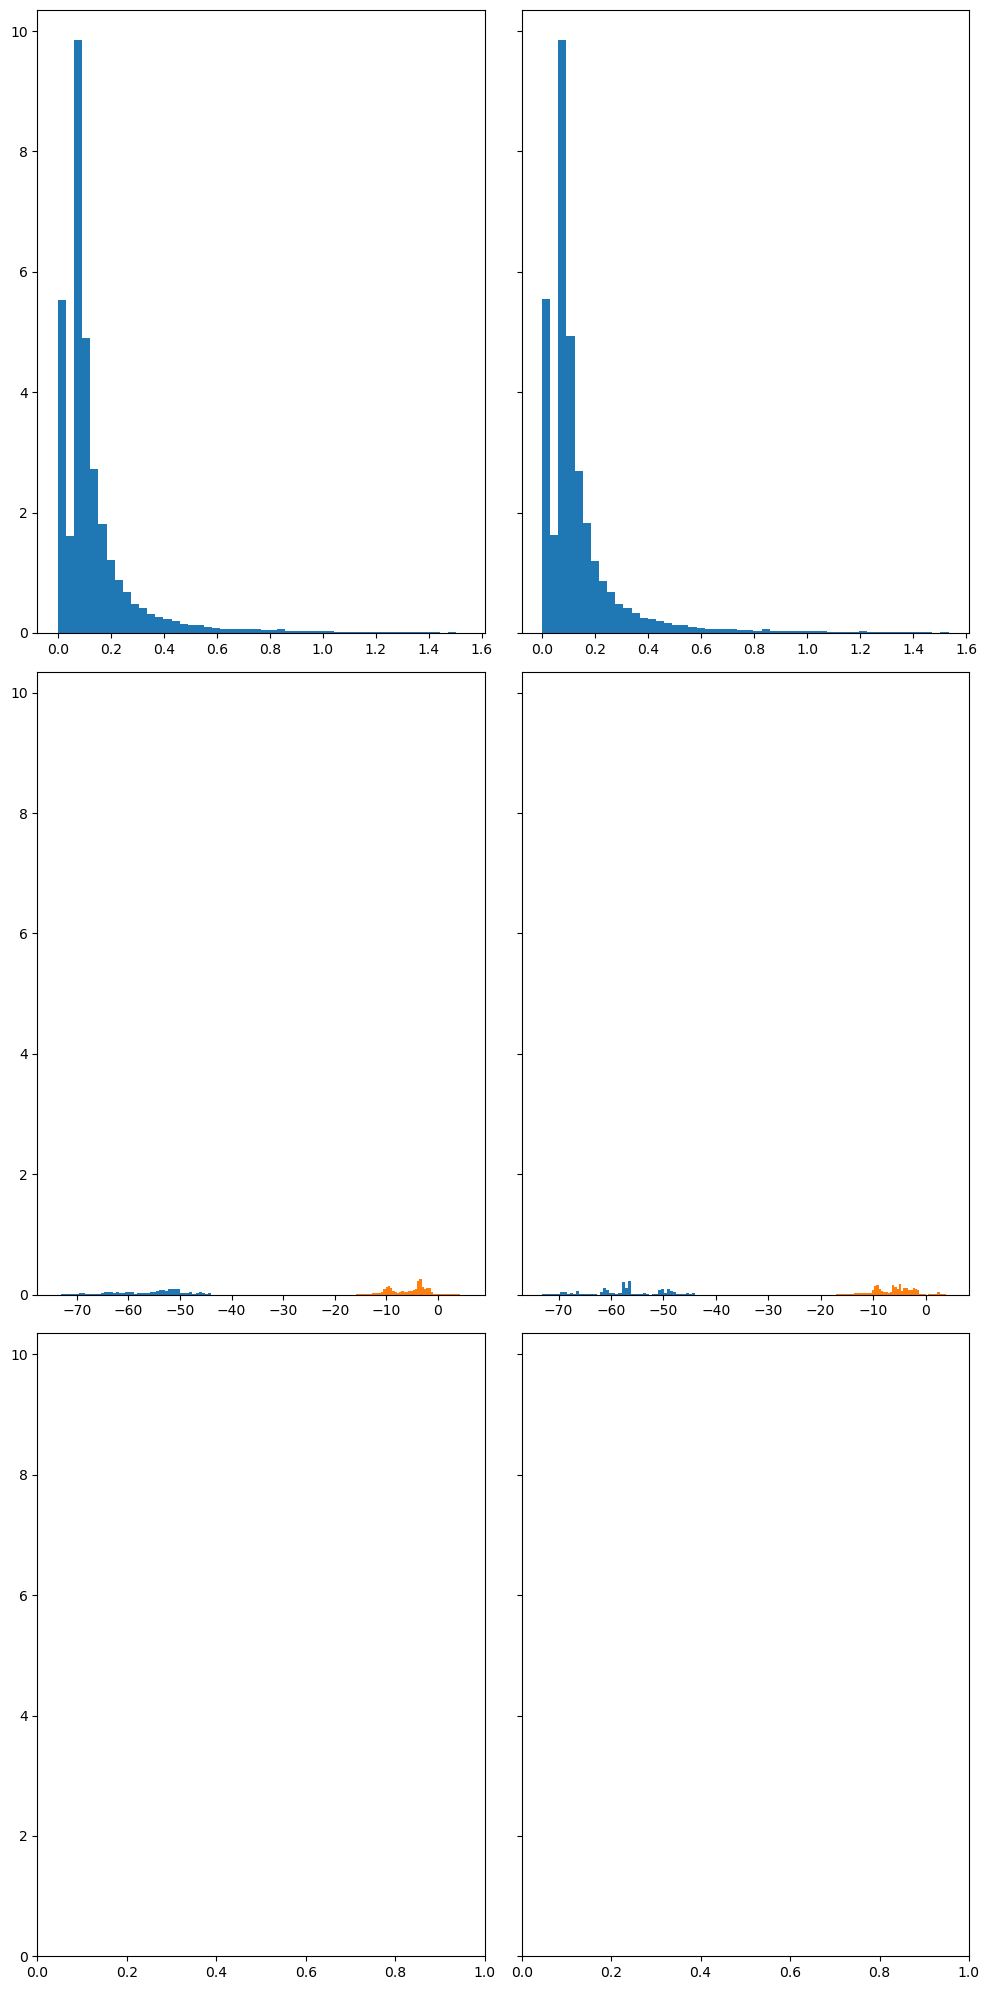

In [118]:
# true vs predicted values distribution decision tree population set
fig, axs = plt.subplots(3, 2, sharey=True, tight_layout=True, figsize=(10,20))

axs[0, 0].hist(y_val_1, bins=50, density=True)
axs[0, 1].hist(y_val_pred_1, bins=50, density=True);
axs[1, 0].hist(y_val_2, bins=50, density=True)
axs[1, 1].hist(y_val_pred_2, bins=50, density=True);
axs[1, 0].hist(y_val_3, bins=50, density=True)
axs[1, 1].hist(y_val_pred_3, bins=50, density=True);

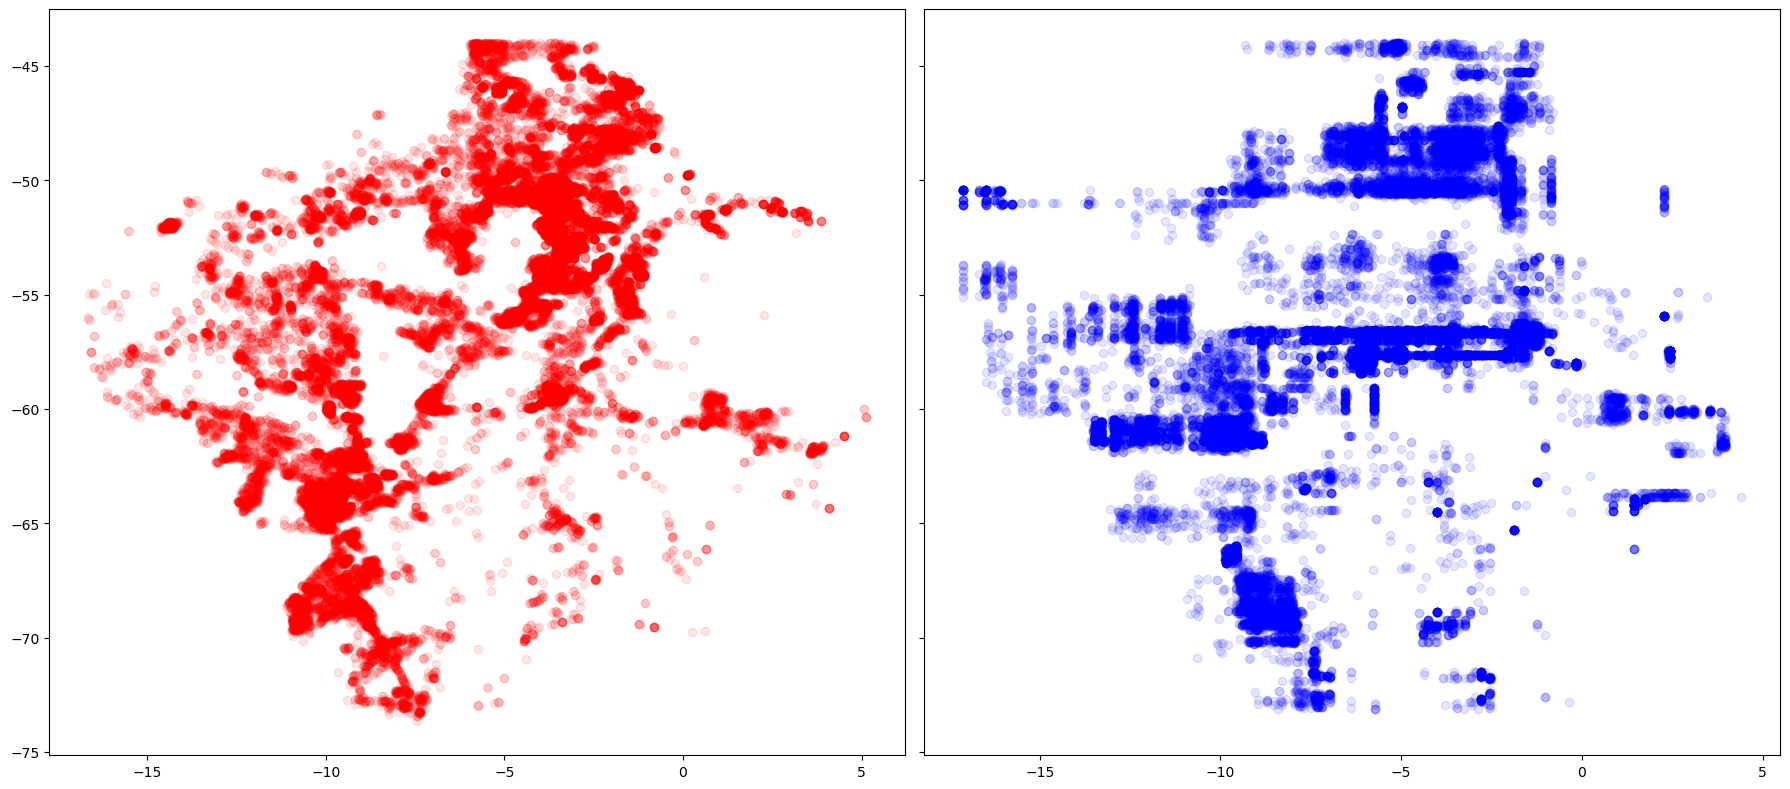

In [119]:
# true vs predicted values visualization population set for Decision Tree
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_3, y=y_val_2, c='red', alpha=0.1)
axs[1].scatter(x=y_val_pred_3, y=y_val_pred_2, c='blue', alpha=0.1);

In [120]:
# 3rd_model---XGBoost Regressor 
encoder = ce.ordinal.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model1 = XGBRegressor(
    n_estimators=1000, # upper threshold
    max_depth=100,
    learning_rate=0.4, 
    n_jobs=-1
)
model2 = XGBRegressor(
    n_estimators=1000, # upper threshold
    max_depth=100,
    learning_rate=0.4, 
    n_jobs=-1
)
model3 = XGBRegressor(
    n_estimators=1000, # upper threshold
    max_depth=100,
    learning_rate=0.4, 
    n_jobs=-1
)

eval_set1 = [(X_train_encoded, y_train_1), 
            (X_val_encoded, y_val_1)]
eval_set2 = [(X_train_encoded, y_train_2), 
            (X_val_encoded, y_val_2)]
eval_set3 = [(X_train_encoded, y_train_3), 
            (X_val_encoded, y_val_3)]

model1.fit(X_train_encoded, y_train_1,
          eval_set=eval_set1,
          eval_metric='rmse',
          early_stopping_rounds=50)
model2.fit(X_train_encoded, y_train_2,
          eval_set=eval_set2,
          eval_metric='rmse',
          early_stopping_rounds=50)
model3.fit(X_train_encoded, y_train_3,
          eval_set=eval_set3,
          eval_metric='rmse',
          early_stopping_rounds=50)

[0]	validation_0-rmse:0.24017	validation_1-rmse:0.24069
[1]	validation_0-rmse:0.14414	validation_1-rmse:0.14444
[2]	validation_0-rmse:0.08652	validation_1-rmse:0.08668
[3]	validation_0-rmse:0.05195	validation_1-rmse:0.05204
[4]	validation_0-rmse:0.03122	validation_1-rmse:0.03126
[5]	validation_0-rmse:0.01879	validation_1-rmse:0.01884
[6]	validation_0-rmse:0.01135	validation_1-rmse:0.01147
[7]	validation_0-rmse:0.00689	validation_1-rmse:0.00713
[8]	validation_0-rmse:0.00423	validation_1-rmse:0.00464
[9]	validation_0-rmse:0.00264	validation_1-rmse:0.00333
[10]	validation_0-rmse:0.00169	validation_1-rmse:0.00272
[11]	validation_0-rmse:0.00113	validation_1-rmse:0.00246
[12]	validation_0-rmse:0.00080	validation_1-rmse:0.00237
[13]	validation_0-rmse:0.00060	validation_1-rmse:0.00233
[14]	validation_0-rmse:0.00049	validation_1-rmse:0.00232
[15]	validation_0-rmse:0.00044	validation_1-rmse:0.00231
[16]	validation_0-rmse:0.00040	validation_1-rmse:0.00231
[17]	validation_0-rmse:0.00038	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=100,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
model1.best_ntree_limit

17

In [122]:
model2.best_ntree_limit

8

In [123]:
model3.best_ntree_limit

5

In [124]:
# XGBoost trained on population

xgb1 = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=50)
)
xgb2 = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=50)
)
xgb3 = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=50)
)
xgb1.fit(X_train, y_train_1)
y_val_pred_1 = xgb1.predict(X_val)
xgb2.fit(X_train, y_train_2)
y_val_pred_2 = xgb2.predict(X_val)
xgb3.fit(X_train, y_train_3)
y_val_pred_3 = xgb3.predict(X_val)
print(f'XGBoost Validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.6f} area_km')
print(f'XGBoost Validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.6f} lon')
print(f'XGBoost Validation MAE: {mean_absolute_error(y_val_3, y_val_pred_3):.6f} lat')
print(f'XGBoost Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.6f} area_km')
print(f'XGBoost Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.6f} lon')
print(f'XGBoost Validation RMSE loss: {mean_squared_error(y_val_3, y_val_pred_3):.6f} lat')
print(f'XGBoost Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.6f} area_km')
print(f'XGBoost Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.6f} lon')
print(f'XGBoost Validation R^2 coefficient: {r2_score(y_val_3, y_val_pred_3):.6f} lat')

XGBoost Validation MAE: 0.000977 area_km
XGBoost Validation MAE: 4.380914 lon
XGBoost Validation MAE: 1.657299 lat
XGBoost Validation RMSE loss: 0.000005 area_km
XGBoost Validation RMSE loss: 24.862394 lon
XGBoost Validation RMSE loss: 4.358851 lat
XGBoost Validation R^2 coefficient: 0.999828 area_km
XGBoost Validation R^2 coefficient: 0.433392 lon
XGBoost Validation R^2 coefficient: 0.670243 lat


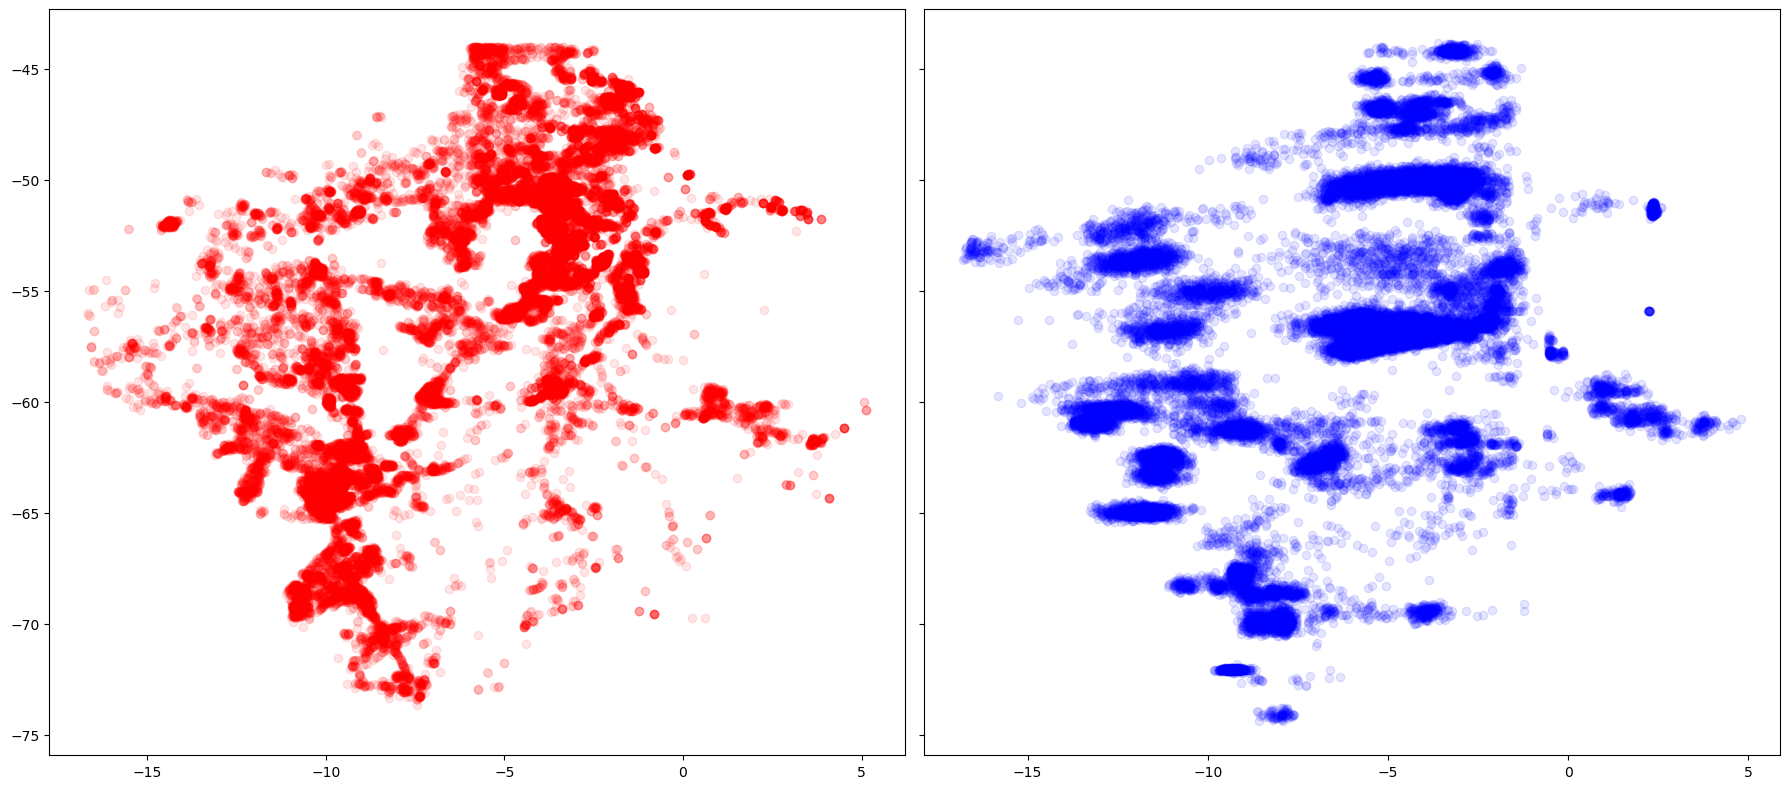

In [125]:
# true vs predicted values visualization population set for xgboost
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_3, y=y_val_2, c='red', alpha=0.1)
axs[1].scatter(x=y_val_pred_3, y=y_val_pred_2, c='blue', alpha=0.1);

In [131]:
#PREDICT ON A ROW FROM VALIDATION SET USING XGBOOST AND DECISION TREE MODELS#

In [132]:
# true values from val set
print(y_val_1.iloc[[200]])
print(y_val_2.iloc[[200]])
print(y_val_3.iloc[[200]])

2230    0.000018
Name: area_km, dtype: float64
2230   -47.892
Name: lon, dtype: float64
2230   -1.742
Name: lat, dtype: float64


In [133]:
# take a row from val set
val_row = X_val.iloc[[200]]
val_row

,year,shape__are,shape__len,day,month,states
2230,2017.0,17.665955,18.618005,6.0,7.0,Para


In [134]:
# predicted values by xgboost model
xgb1.predict(val_row), xgb2.predict(val_row), xgb3.predict(val_row)

(array([3.8304806e-05], dtype=float32),
 array([-56.371098], dtype=float32),
 array([-2.5458798], dtype=float32))

In [135]:
# predicted values by decision tree model
dt1.predict(val_row), dt2.predict(val_row), dt3.predict(val_row)

(array([1.75289106e-05]), array([-56.701]), array([-2.519]))

In [136]:
#PREDICT ON A ROW FROM TEST SET USING XGBOOST AND DECISION TREE MODELS#

In [137]:
# take a row for test set
test_row = X_test.iloc[[0]]
test_row

,year,shape__are,shape__len,day,month,states
0,2018.0,71.88623,66.316744,21.0,7.0,Para


In [138]:
# true values from test set
y_test_1.iloc[[0]], y_test_2.iloc[[0]], y_test_3.iloc[[0]]

(0    0.000071
 Name: area_km, dtype: float64,
 0   -55.42
 Name: lon, dtype: float64,
 0   -6.304
 Name: lat, dtype: float64)

In [139]:
# predicted values by xgboost model ON TEST POPULATION
xgb1.predict(test_row), xgb2.predict(test_row), xgb3.predict(test_row)

(array([8.049978e-05], dtype=float32),
 array([-56.56104], dtype=float32),
 array([-6.071582], dtype=float32))

In [140]:
# predicted values by decision tree model
dt1.predict(test_row), dt2.predict(test_row), dt3.predict(test_row)

(array([7.12975893e-05]), array([-58.053]), array([-4.869]))

In [141]:
## PREDICTIONS ON TEST SET USING XGBOOST

In [142]:
# final predictions with xgboost
y_pred_1 = xgb1.predict(X_test)
y_pred_2 = xgb2.predict(X_test)
y_pred_3 = xgb3.predict(X_test)

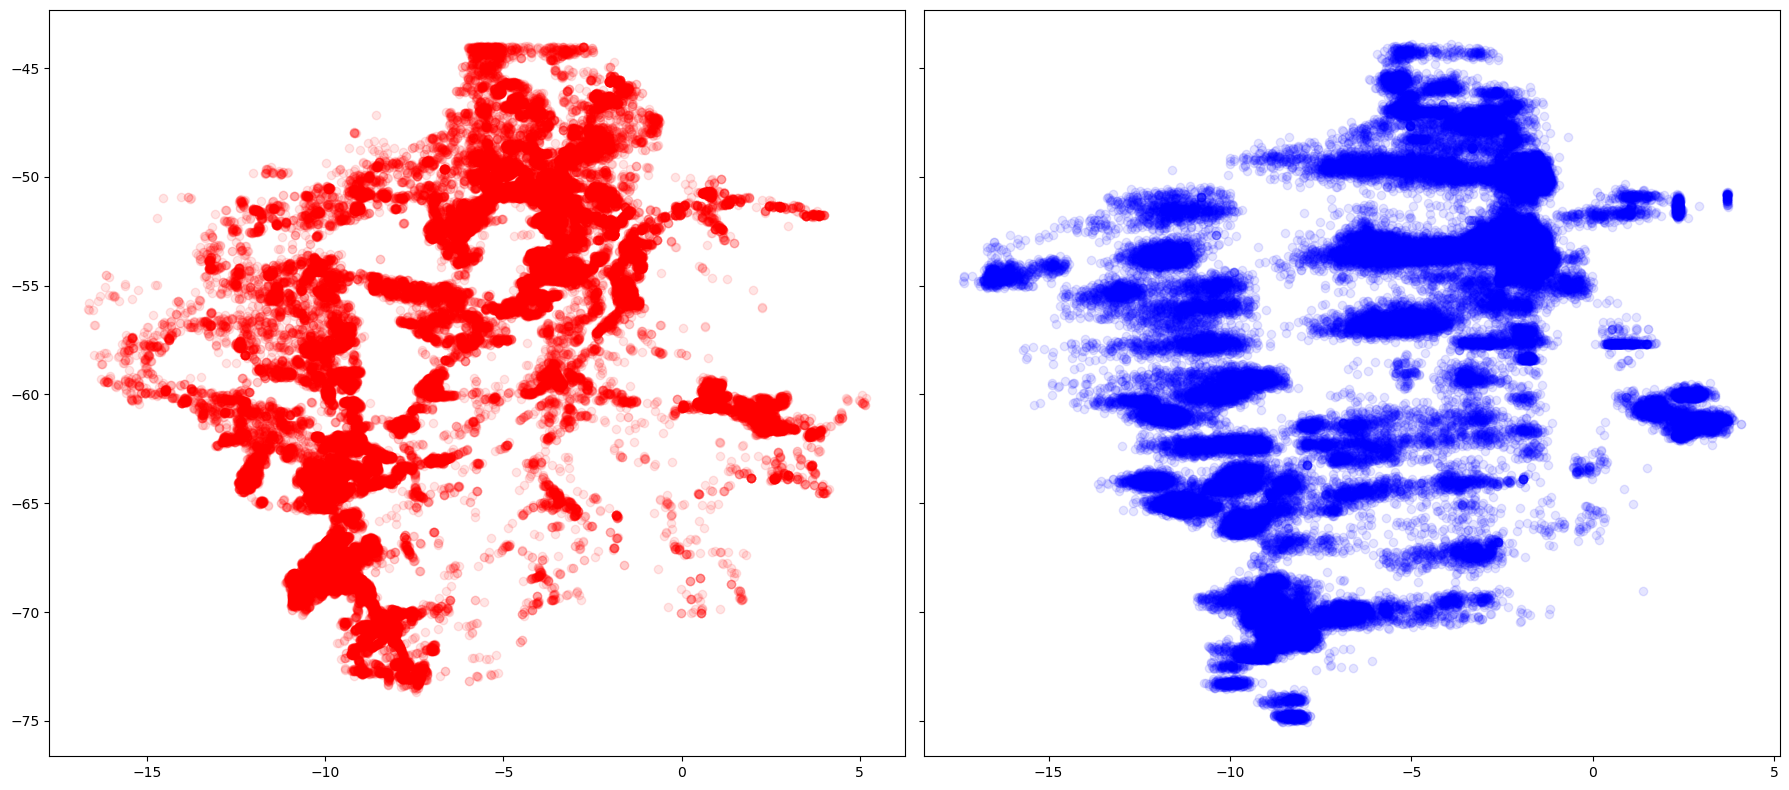

In [143]:
# true vs predicted values with xgboost visualization ON POPULATION
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_test_3, y=y_test_2, c='red', alpha=0.1)
axs[1].scatter(x=y_pred_3, y=y_pred_2, c='blue', alpha=0.1);

In [144]:
##PREDICTIONS ON TEST SET USING DT

In [145]:
# final predictions with DT
y_pred_1 = dt1.predict(X_test)
y_pred_2 = dt2.predict(X_test)
y_pred_3 = dt3.predict(X_test)

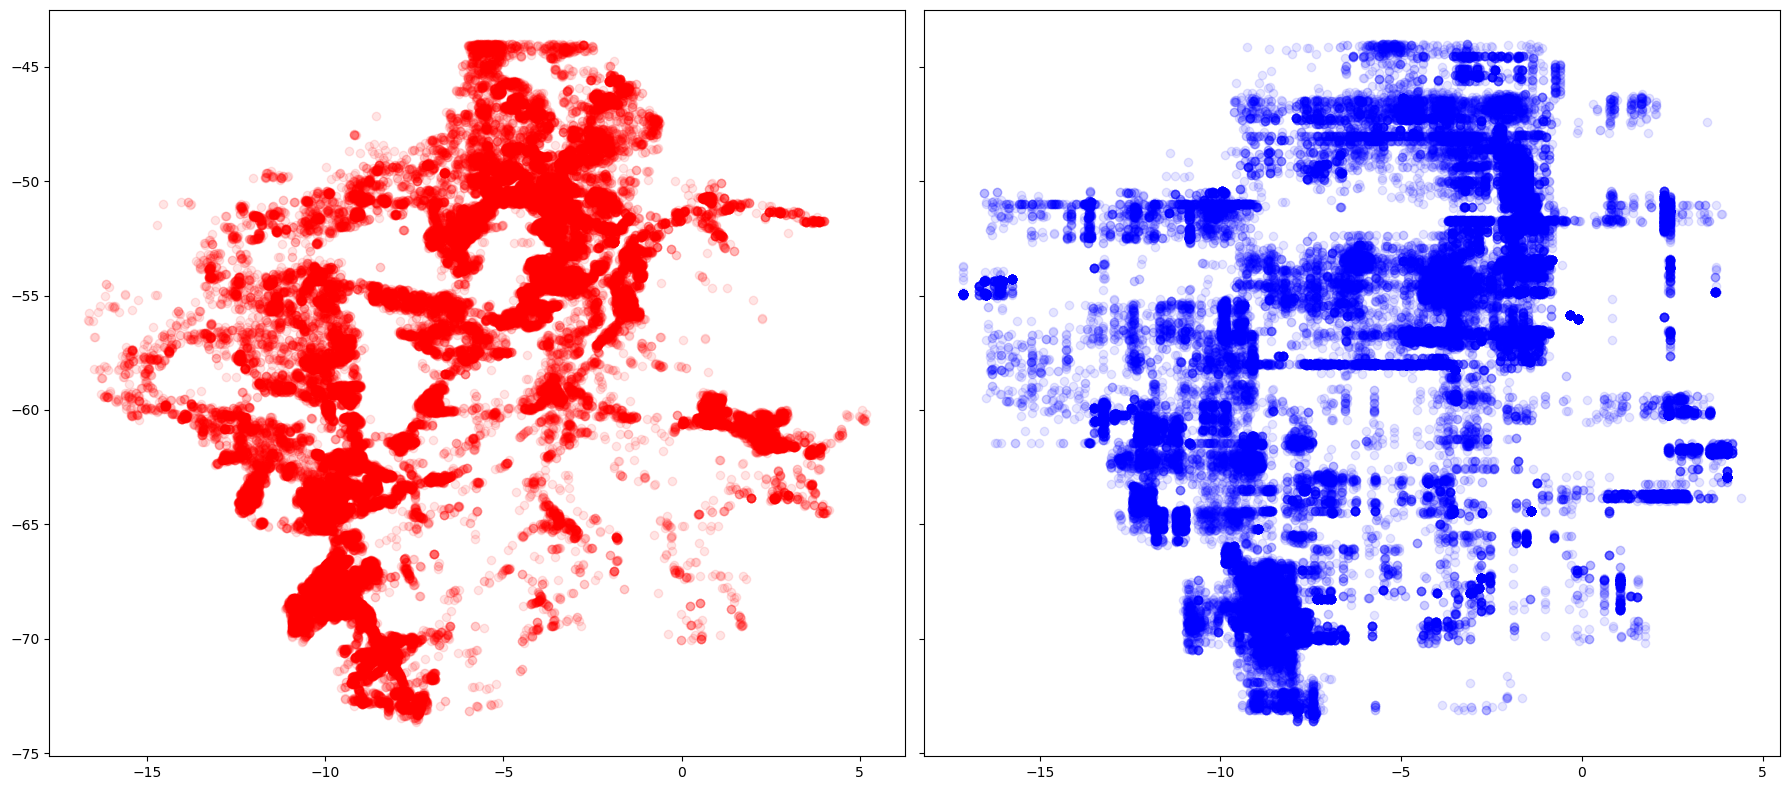

In [146]:
# true vs predicted values with DT visualization ON POPULATION
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_test_3, y=y_test_2, c='red', alpha=0.1)
axs[1].scatter(x=y_pred_3, y=y_pred_2, c='blue', alpha=0.1);

In [147]:
## Testing model for prediction using XGBOOST

In [148]:
# define function with xgb model 
def predict(year, shape__are, shape__len, day, month, states):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[year, shape__are, shape__len, day, month, states]], 
        columns=['year', 'shape__are', 'shape__len', 'day', 'month', 'states']
    )
    
    # Get the model's prediction
    pred1 = xgb1.predict(df)[0]
    pred2 = xgb2.predict(df)[0]
    pred3 = xgb3.predict(df)[0]

    print(pred1)
    print(pred2)
    print(pred3)

    results = f'Area_km {pred1}, Longitude {pred2}, Latitude {pred3}'
    return results

In [149]:
predict(2026, 15.665955, 56.316744, 15, 3, 'para')

5.0078354e-05
-60.54664
1.4874866


'Area_km 5.00783535244409e-05, Longitude -60.54663848876953, Latitude 1.4874866008758545'

In [150]:
# define function with DT model 
def predict(year, shape__are, shape__len, day, month, states):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[year, shape__are, shape__len, day, month, states]], 
        columns=['year', 'shape__are', 'shape__len', 'day', 'month', 'states']
    )
    
    # Get the model's prediction
    pred1 = dt1.predict(df)[0]
    pred2 = dt2.predict(df)[0]
    pred3 = dt3.predict(df)[0]

    print(pred1)
    print(pred2)
    print(pred3)

    results = f'Area_km {pred1}, Longitude {pred2}, Latitude {pred3}'
    return results

In [151]:
predict(2026, 15.665955, 56.316744, 15, 3, 'para')

1.5503470856e-05
-57.941
-3.91


'Area_km 1.5503470856e-05, Longitude -57.941, Latitude -3.91'